<a href="https://colab.research.google.com/github/MagfirohIndahKarisma/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – GLOBAL THRESHOLDING

### Nama: Magfiroh Indah Karisma
### NIM: 2141720180
### Kelas: TI-3F

## TUGAS PRAKTIKUM

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut

In [3]:
pip install pytesseract

In [7]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

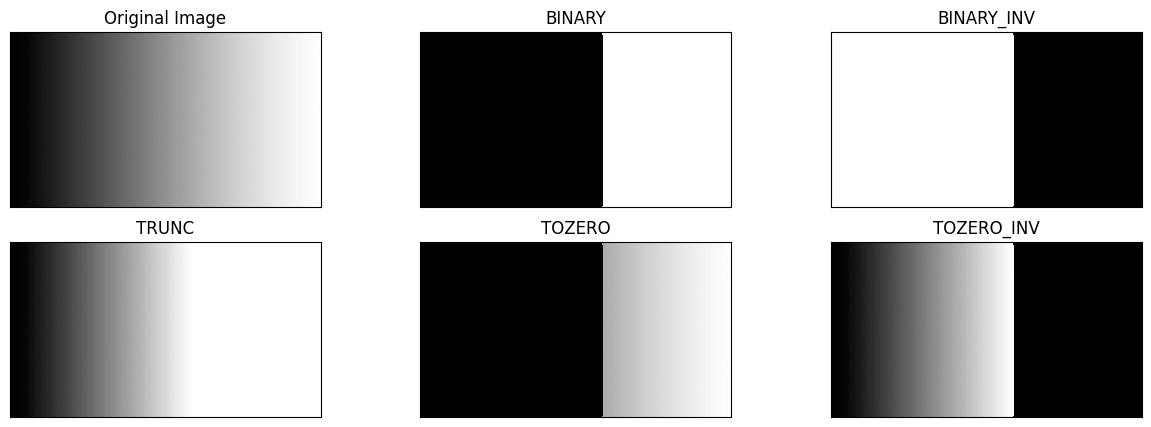

In [10]:
filename = '/content/drive/MyDrive/Study/PCVK/images/gradient.jpg'
img = cv2.imread(filename, 0)  # Baca gambar sebagai grayscale (mode '0')
thresh1 = img.copy()
thresh2 = img.copy()
thresh3 = img.copy()
thresh4 = img.copy()
thresh5 = img.copy()
thresh = 170  # Nilai Threshold yang ditentukan

# 1. thresh1 jika pixel di img > 170, maka thresh1 bernilai 255 (putih) selain itu bernilai 0 (hitam)
thresh1[img > thresh] = 255
thresh1[img <= thresh] = 0

# 2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1

# 3. Threshold Truncate
thresh3[img > thresh] = thresh

# 4. Threshold Tozero
thresh4[img <= thresh] = 0

# 5. Threshold Tozero Inverse
thresh5[img > thresh] = 0

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')  # Tambahkan 'cmap' untuk mengatasi masalah tampilan warna
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-13-9b600140a37e>:17: RuntimeWarning: invalid value encountered in divide
  mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)


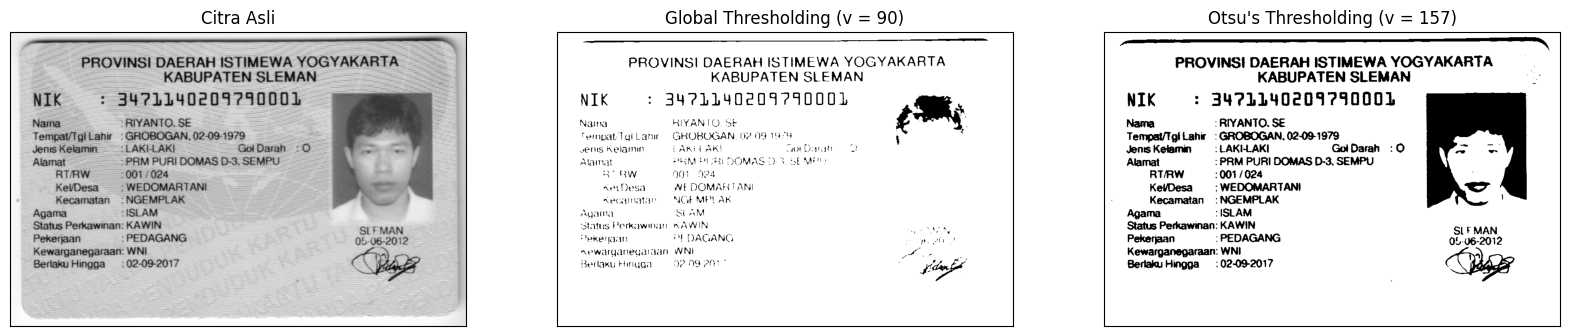

In [13]:
filename = '/content/drive/MyDrive/Study/PCVK/images/KTP/ktp.png'
img = cv2.imread(filename, 0)
blur = cv2.GaussianBlur(img, (5, 5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]:
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)
        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0

    return final_img, final_thresh

otsu_binar, otsu_thresh = otsu(blur)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_binar]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

Petunjuk:

a. Anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).


6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)


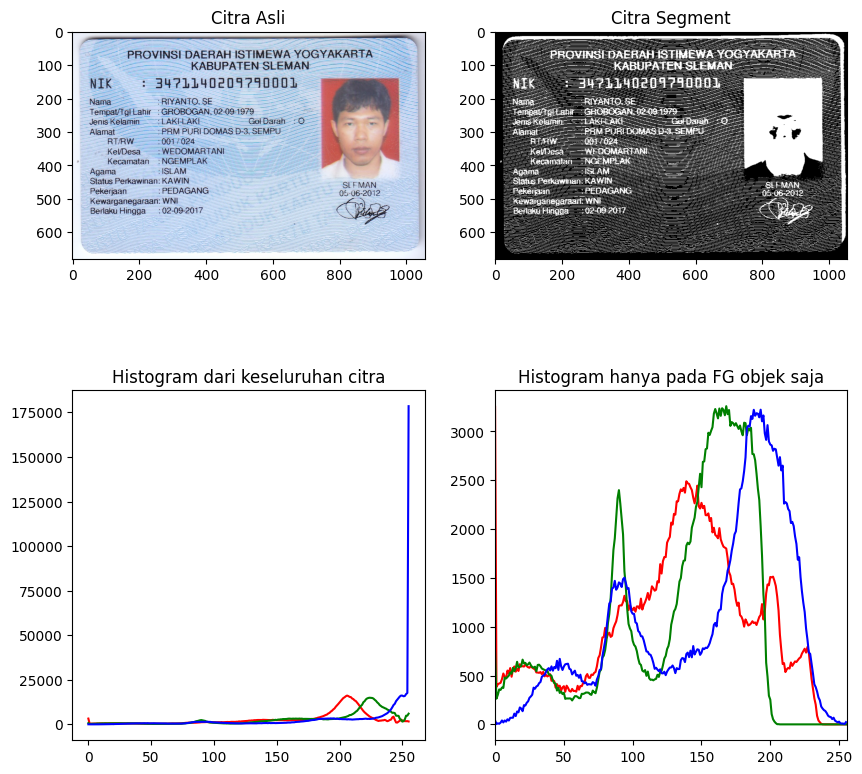

In [17]:
filename = '/content/drive/MyDrive/Study/PCVK/images/KTP/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7f26be642920>)

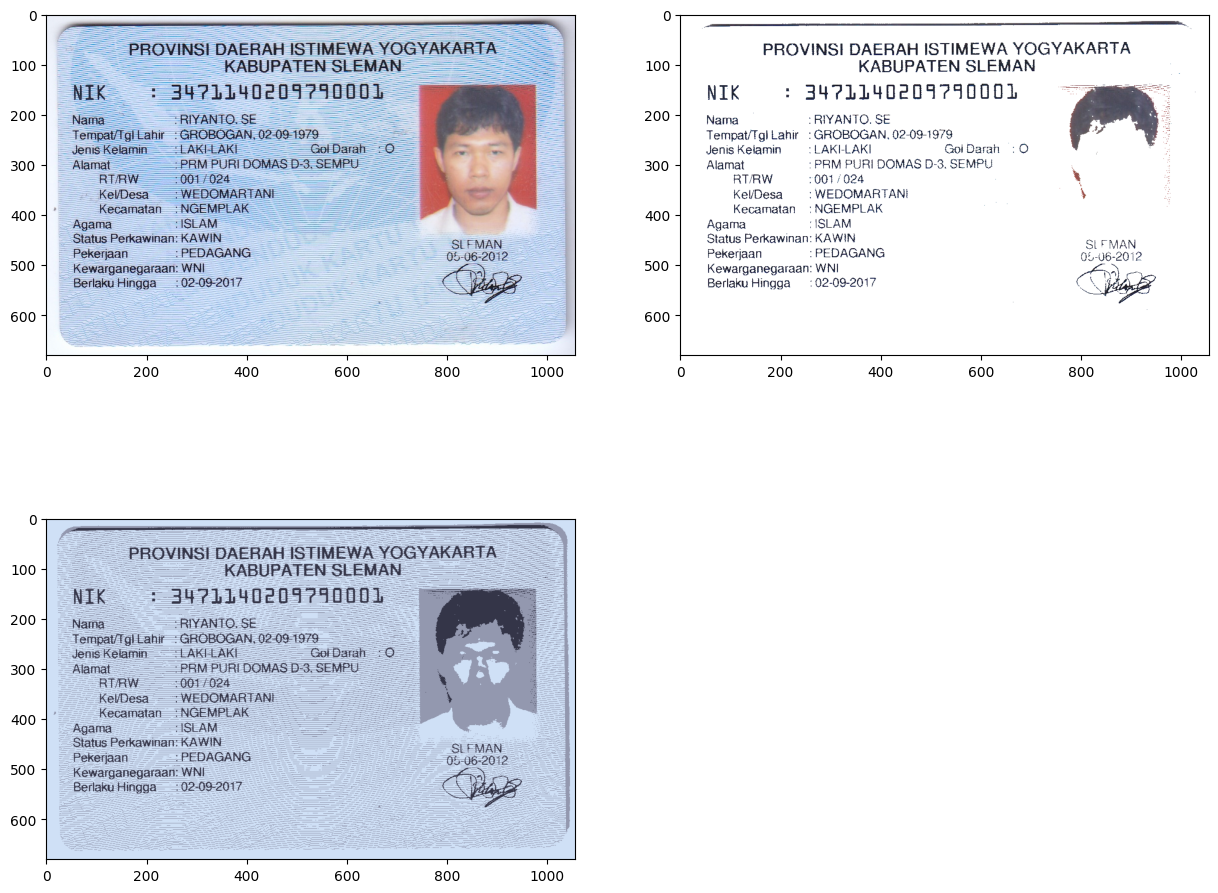

In [20]:
filename = '/content/drive/MyDrive/Study/PCVK/images/KTP/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta
array 2D sebagai masukan, sedangkan image aslinya adalah
array 3D
selanjutnya kita perlu melakukan flattening array image
masukan
'''
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid
sudah tidak terlalu banyak pergeseran posisi antara
interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data
yang besar, maka kita akan hentikan iterasi saat jumlah
iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn
posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama
(hijau, biru, dan putih/orange). untuk percobaan ini kita
akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

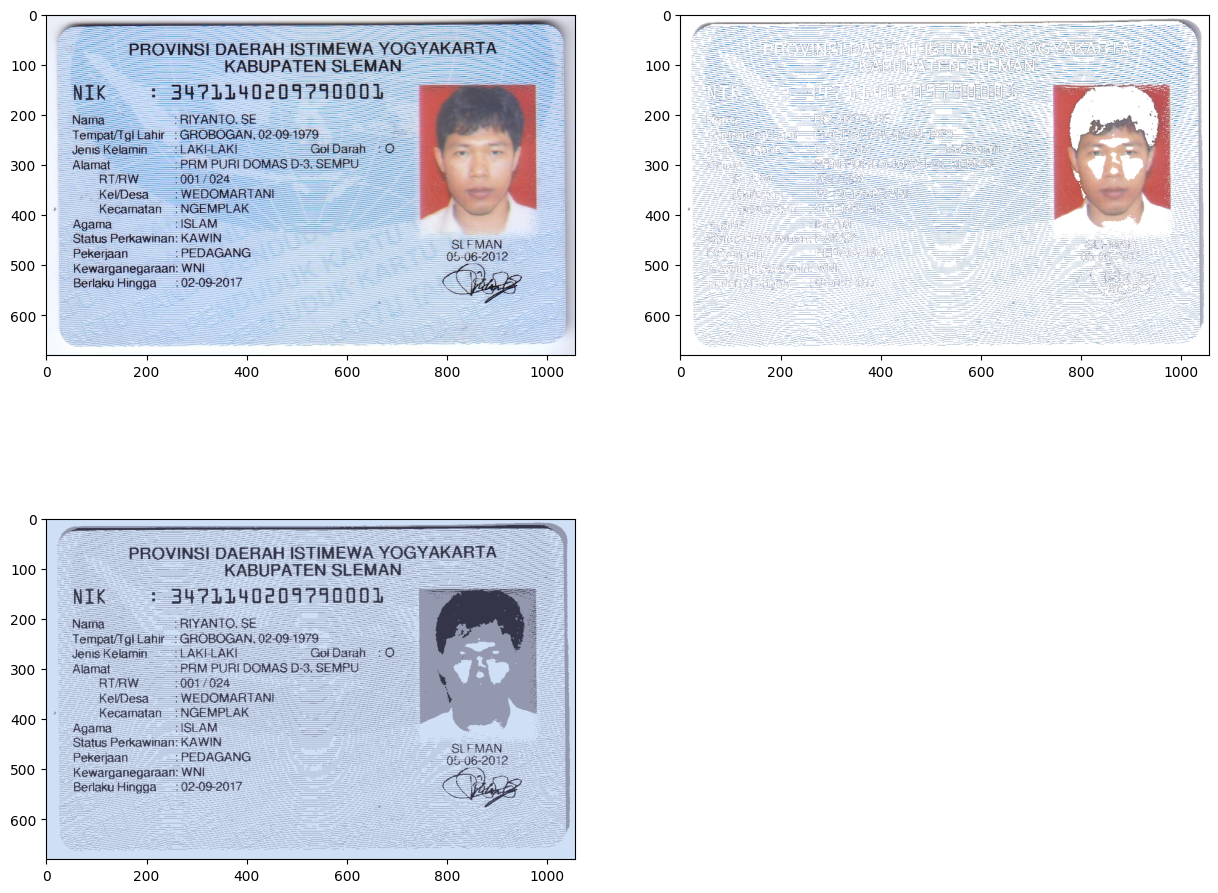

In [24]:
filename = '/content/drive/MyDrive/Study/PCVK/images/KTP/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)  # Ubah iterasi menjadi 100

k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
mask = labels != 1

for i in range(masked_image.shape[0]):
    for j in range(masked_image.shape[1]):
        if mask[i * masked_image.shape[1] + j]:
            masked_image[i, j, :] = [255, 255, 255]

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.show()

### E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.
1. Install PIP OCR

In [25]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (5,555 kB/s)
debconf: unable to ini

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()

In [26]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file


In [27]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/KTP/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4. Menambahkan kotak untuk deteksi teks pada gambar

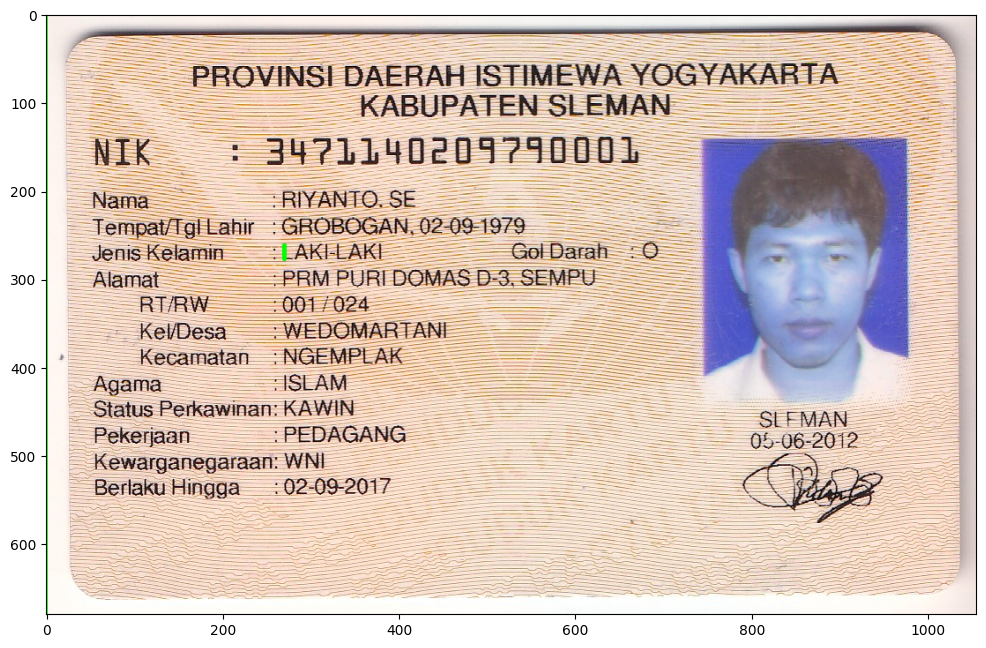

In [30]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2)
display(img)

5. Hasil pembacaan KTP Menjadi text

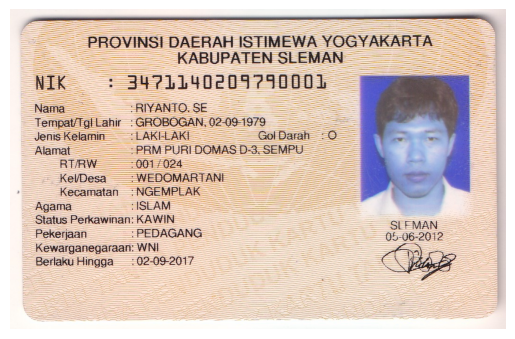

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



In [35]:
img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/KTP/ktp.png')
plt.imshow(img)
plt.axis('off')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed, output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

F. Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan
GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat
pada KTP.

In [40]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 30.9 MB/s eta 0:00:00


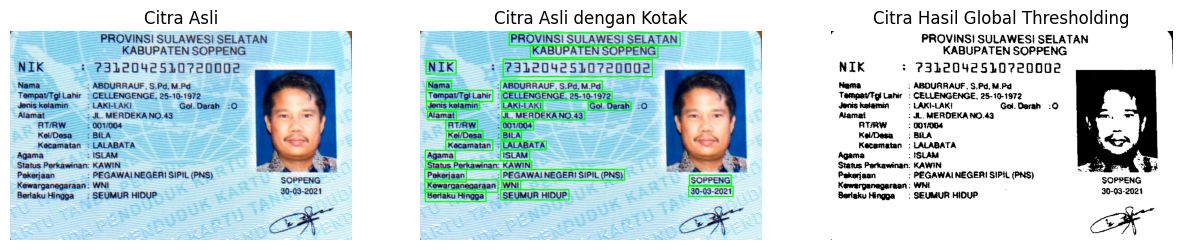

PROVINSI SULAWESI SELATAN
KABUPATEN SOPPENG
NIK
7312042510720002
Nam
ABDUARAUF , S Pd, M.Pd
TonpatFd Lahlf
CELLEMGENGE. 25-10-1972
Jonis koxahin
LAKI-LAKI
Gd. Darah
:0
Namndf
1MEROEKANO.43
ATRRW
OI40
KNDara
BEA
Kacanatan
LALABATA
Aguma
ISLAM
Status Porkawinan: KAWIN
Pokojean
PEGAWAI NeGERI SIPIL (PNS)
SOPpEnG
Kowargunogartan
WMI
Bodaku Hnoa
SEUMUR HDUP
30-03-2021


In [51]:
import easyocr
import matplotlib.pyplot as plt
import cv2

reader = easyocr.Reader(['id'])

img = plt.imread("/content/drive/MyDrive/Study/PCVK/images/KTP/KTP7.jpeg")

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

img_with_boxes = img.copy()
for (bbox, text, prob) in reader.readtext(img):
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    img_with_boxes = cv2.rectangle(img_with_boxes, top_left, bottom_right, (0, 255, 0), 2)

plt.subplot(132)
plt.imshow(img_with_boxes)
plt.title('Citra Asli dengan Kotak')
plt.axis('off')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(133)
plt.imshow(threshed, cmap='gray')
plt.title('Citra Hasil Global Thresholding')
plt.axis('off')

plt.show()

results = reader.readtext(threshed, detail=0)
for text in results:
    print(f'{text}')

### HASIL TEKS JIKA DIEKSTRAK DARI CITRA ASLI

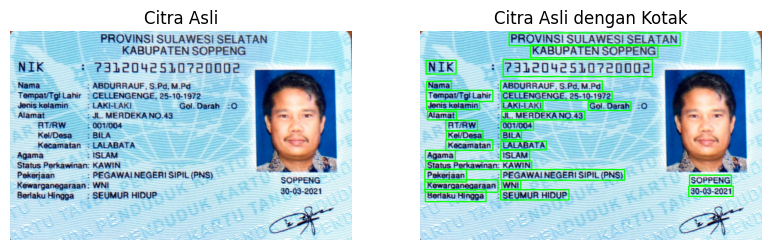

PROVINSI SULAWESI SELATAN
KABUPATEN SOPPENG
NIK
7312042510720002
Nama
ABDURRAUF , S Pd M Pd
Tompat Tgl Lahır
CELLENGENGE 25-10-1972
Jenis kelamin
Laki LAKI
GolDarah
Alamat
JL MERDEKANO 43
RTRW
001/004
Kel/Desa
BILA
Kecamatan
LALABATA
Agama
ISLAM
Slatus Perkawinan: KAWIN
Pokerjaan
PEGAWAI NEGERI SIPIL (PNS)
SOPPENG
Kowarganegaraan
WNI
Berlaku Hingga
SEUMUR HIDUP
30-03-2021


In [54]:
import easyocr
import matplotlib.pyplot as plt
import cv2

reader = easyocr.Reader(['id'])

img = plt.imread("/content/drive/MyDrive/Study/PCVK/images/KTP/KTP7.jpeg")

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

img_with_boxes = img.copy()
for (bbox, text, prob) in reader.readtext(img):
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    img_with_boxes = cv2.rectangle(img_with_boxes, top_left, bottom_right, (0, 255, 0), 2)

plt.subplot(132)
plt.imshow(img_with_boxes)
plt.title('Citra Asli dengan Kotak')
plt.axis('off')

plt.show()

results = reader.readtext(img, detail=0)
for text in results:
    print(f'{text}')